In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

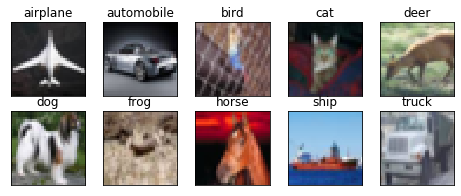

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [29]:
# Define the model (Acc = 75.93)
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode = 'same', input_shape=(32, 32, 3))) #32
model.add(Activation('relu')) #30
model.add(BatchNormalization())

model.add(SeparableConv2D(64,3,3, border_mode = 'same', use_bias = False)) #32
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) #16
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, 1, 1, border_mode = 'same', use_bias = False)) #16
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(128, 1, 1, border_mode = 'same', use_bias = False)) #16
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #8
model.add(Dropout(0.1))


model.add(SeparableConv2D(128,3,3, border_mode = 'same', use_bias = False)) #8
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))


model.add(SeparableConv2D(256, 3, 3, border_mode = 'same', use_bias = False)) #8
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Dropout(0.1))

model.add(SeparableConv2D(256,3, 3,  border_mode = 'same', use_bias = False)) #2
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(10,1,1, activation='relu')) #1

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


# Compile the model
model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), use_bias=False, padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (1, 1), use_bias=False, padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (1, 1), use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarni

In [40]:
# Define the model (Acc = 77.99)
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode = 'same',  activation= 'relu',input_shape=(32, 32, 3))) #32
model.add(BatchNormalization())

model.add(SeparableConv2D(32,3,3, border_mode = 'same', activation= 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 3, 3, border_mode = 'same',  activation= 'relu')) #32
model.add(BatchNormalization())

model.add(SeparableConv2D(64,3,3, border_mode = 'same', activation= 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(SeparableConv2D(128, 3, 3, border_mode = 'same',  activation= 'relu')) #32
model.add(BatchNormalization())

model.add(SeparableConv2D(128,3,3, border_mode = 'same', activation= 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(SeparableConv2D(256,3,3, border_mode='same', activation='relu'))
model.add(BatchNormalization())


model.add(SeparableConv2D(10,1,1, activation='relu')) #1
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-pac

In [51]:
# Define the model (Acc = 77.99)
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode = 'same',  activation = 'relu', kernel_initializer='he_uniform',input_shape=(32, 32, 3))) #32
model.add(BatchNormalization())

model.add(SeparableConv2D(32,3,3, border_mode = 'same', activation= 'relu',kernel_initializer='he_uniform')) #32
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #8
model.add(Dropout(0.2))

model.add(SeparableConv2D(64, 3, 3, border_mode = 'same',  activation= 'relu',kernel_initializer='he_uniform')) #8
model.add(BatchNormalization())

model.add(SeparableConv2D(64,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #8
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Dropout(0.2))

model.add(SeparableConv2D(128, 3, 3, border_mode = 'same',  activation= 'relu', kernel_initializer='he_uniform')) #4
model.add(BatchNormalization())

model.add(SeparableConv2D(128,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #4
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #2
model.add(Dropout(0.2))

model.add(SeparableConv2D(256,3,3, border_mode='same', activation='relu', kernel_initializer='he_uniform')) #2
model.add(BatchNormalization())


model.add(SeparableConv2D(10,1,1, activation='relu', kernel_initializer='he_uniform'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation=

In [56]:
# Define the model (Acc = 79.97)
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode = 'same',  activation = 'relu', kernel_initializer='he_uniform',input_shape=(32, 32, 3))) #32
model.add(BatchNormalization())

model.add(SeparableConv2D(32,3,3, border_mode = 'same', activation= 'relu',kernel_initializer='he_uniform')) #32
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #16


model.add(SeparableConv2D(64, 3, 3, border_mode = 'same',  activation= 'relu',kernel_initializer='he_uniform')) #16
model.add(BatchNormalization())

model.add(SeparableConv2D(64,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #8

model.add(SeparableConv2D(128, 3, 3, border_mode = 'same',  activation= 'relu', kernel_initializer='he_uniform')) #8
model.add(BatchNormalization())

model.add(SeparableConv2D(128,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4

model.add(SeparableConv2D(256,3,3, border_mode='same', activation='relu', kernel_initializer='he_uniform')) #4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(10,1,1, activation='relu', kernel_initializer='he_uniform'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu"

In [72]:
# Define the model (Achieved Validation ACCURACY of 84.2 in 47th Epoch.)
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode = 'same',  activation = 'relu', kernel_initializer='he_uniform',input_shape=(32, 32, 3))) # Output = 32, RF = 3x3
model.add(BatchNormalization())

model.add(SeparableConv2D(32,3,3, border_mode = 'same', activation= 'relu',kernel_initializer='he_uniform')) #Output = 32, RF = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(32,3,3, border_mode = 'same', activation= 'relu',kernel_initializer='he_uniform')) #Output = 32, RF = 7x7
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) #Output = 16, RF = 8x8


model.add(SeparableConv2D(64, 3, 3, border_mode = 'same',  activation= 'relu',kernel_initializer='he_uniform')) #Output = 16, RF = 12x12
model.add(BatchNormalization())

model.add(SeparableConv2D(64,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #Output = 16, RF = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #Output = 16, RF = 20x20
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #Output = 8, RF= 22x22

model.add(SeparableConv2D(128, 3, 3, border_mode = 'same',  activation= 'relu', kernel_initializer='he_uniform')) #Output = 8, RF = 30x30
model.add(BatchNormalization())

model.add(SeparableConv2D(128,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #Output = 8, RF = 38x38
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128,3,3, border_mode = 'same', activation= 'relu', kernel_initializer='he_uniform')) #Output = 8, RF = 46x46
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #Output = 4, RF = 50x50
model.add(Dropout(0.1))

model.add(SeparableConv2D(256,3,3, border_mode='same', activation='relu', kernel_initializer='he_uniform')) #Output = 4, RF = 66x66
model.add(BatchNormalization())

model.add(SeparableConv2D(10,1,1, activation='relu', kernel_initializer='he_uniform')) 
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `Separable

In [73]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_232 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_176 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_233 (Separa (None, 32, 32, 32)        1344      
_________________________________________________________________
batch_normalization_177 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_107 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_234 (Separa (None, 32, 32, 32)        1344      
_________________________________________________________________
batch_normalization_178 (Bat (None, 32, 32, 32)      

Epoch 1/49

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/390 [..............................] - ETA: 56s - loss: 0.6633 - acc: 0.7422

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=49)`


390/390 [==============================] - 42s 107ms/step - loss: 0.9235 - acc: 0.6775 - val_loss: 0.8598 - val_acc: 0.7104
Epoch 2/49

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 41s 105ms/step - loss: 0.8159 - acc: 0.7149 - val_loss: 0.8102 - val_acc: 0.7286
Epoch 3/49

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 40s 104ms/step - loss: 0.7623 - acc: 0.7318 - val_loss: 0.8633 - val_acc: 0.7082
Epoch 4/49

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 40s 104ms/step - loss: 0.7233 - acc: 0.7465 - val_loss: 0.6895 - val_acc: 0.7646
Epoch 5/49

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 40s 103ms/step - loss: 0.6948 - acc: 0.7605 - val_loss: 0.7401 - val_acc: 0.7512
Epoch 6/49

Epoch 00006: LearningRat

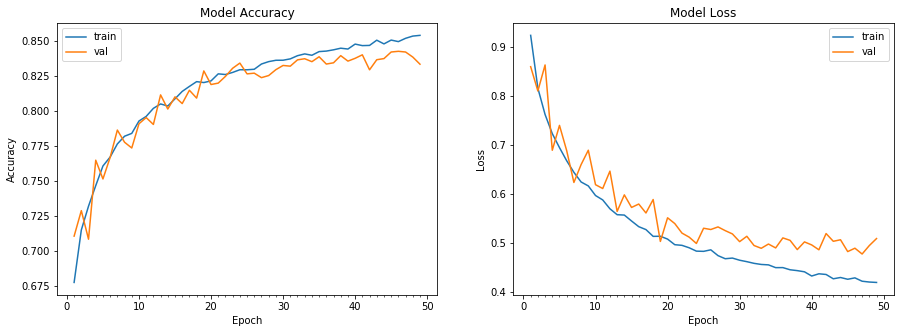

Accuracy on test data is: 83.31


In [75]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(width_shift_range=0.1,rotation_range=30, height_shift_range=0.1, horizontal_flip=True)

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 49,
                                 callbacks = [LearningRateScheduler(scheduler, verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))